# HOMEWORK #1, Kevin Ovendorf

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd 
import sys 
import matplotlib 
import numpy as np

# Enable inline plotting
%matplotlib inline

In [2]:
# Double check all libaries are current
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.25.1
Matplotlib version 3.1.1


#### Q1. Create a pandas data frame using the data in the ‘auto-mpg.csv’ file.

In [3]:
# Locate and import data into the enviornment in the form of a dataframe
df = pd.read_csv('auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6
394,44.0,4,97.0,52,2130,24.6
395,32.0,4,135.0,84,2295,11.6
396,28.0,4,120.0,79,2625,18.6


#### Q2. Display the first 7 rows in the data frame.

In [4]:
# Print first 7 records
df[:7]

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5
5,15.0,8,429.0,198,4341,10.0
6,14.0,8,454.0,220,4354,9.0


#### Q3. Display the number of entries and the data types of all the fields.

In [30]:
# Display the number of entries of each field
len(df)

398

In [6]:
# Display the data types of each field
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
dtype: object

#### Q4. Display the unique values of the ‘cylinders’ field.

In [7]:
# Use the unique property of the dataframe to find all the unique records of the "cylinders" column
df['cylinders'].unique()

array([8, 4, 6, 3, 5])

#### Q5. Show the mean, std, min, and max of 'mpg' attribute.

In [8]:
# Display the mean, std, min, and max in a table (mpg)
print('Mean:', df['mpg'].mean())
print('Standard Deviation:', df['mpg'].std())
print('Minimum:', df['mpg'].min())
print('Maximum:', df['mpg'].max())

Mean: 23.514572864321615
Standard Deviation: 7.815984312565782
Minimum: 9.0
Maximum: 46.6


#### Q6. Plot the histogram of 'mpg' field.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e76e240>]],
      dtype=object)

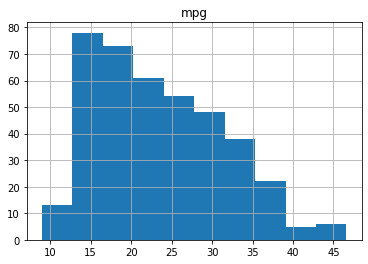

In [9]:
# show the distribution of different MPGs in the dataset through a histogram
df.hist('mpg')

#### Q7. Create a new data frame that groups the entries by ‘cylinders’ and aggregates them by taking the mean for all the fields. Display the new data frame.

In [10]:
# Group the original dataframe by the amount of cylinders per engine
# then from there average out all of the attributes per the amount of cylinders 
cylind = df.groupby(['cylinders'])['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'].mean()
cylind.head()

,mpg,displacement,weight,acceleration
cylinders,,,,
3,20.550000,72.500000,2398.500000,13.250000
4,29.286765,109.796569,2308.127451,16.601471
5,27.366667,145.000000,3103.333333,18.633333
6,19.985714,218.142857,3198.226190,16.263095
8,14.963107,345.009709,4114.718447,12.955340


#### Q8. Display the index of the new data frame.

In [11]:
# Ensure the index is the number of cylinders
cylind.index[:]

Int64Index([3, 4, 5, 6, 8], dtype='int64', name='cylinders')

In [12]:
# Ensure the column titles are correct
cylind.columns

Index(['mpg', 'displacement', 'weight', 'acceleration'], dtype='object')

#### Q9. Create a new field ‘disp_per_cyl’ that gives the displacement per cylinder.

In [13]:
# # calculate the ratio of displacement to cylinders and then let it be its own field
df['disp_per_cyl'] =  (df['displacement']/df['cylinders'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,disp_per_cyl
0,18.0,8,307.0,130,3504,12.0,38.375
1,15.0,8,350.0,165,3693,11.5,43.750
2,18.0,8,318.0,150,3436,11.0,39.750
3,16.0,8,304.0,150,3433,12.0,38.000
4,17.0,8,302.0,140,3449,10.5,37.750


#### Q10. Create a bar plot for ‘mpg’ vs ‘cylinders’.

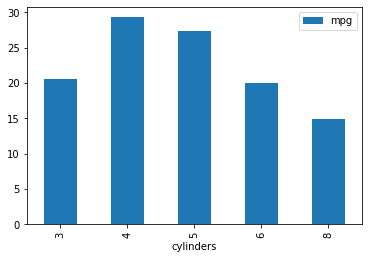

In [14]:
# plot mpg vs cylinders where cylinders, the index, is the x-axis
cylind.plot.bar(y='mpg')

#### Q11. Create a line plot for ‘disp per cyl’ vs ‘cylinders’.

In [15]:
# add disp_per_cyl.mean() to the cylind table so it can be plotted vs cylinders
cylind = df.groupby(['cylinders'])['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'disp_per_cyl'].mean()
cylind.head()

,mpg,displacement,weight,acceleration,disp_per_cyl
cylinders,,,,,
3,20.550000,72.500000,2398.500000,13.250000,24.166667
4,29.286765,109.796569,2308.127451,16.601471,27.449142
5,27.366667,145.000000,3103.333333,18.633333,29.000000
6,19.985714,218.142857,3198.226190,16.263095,36.357143
8,14.963107,345.009709,4114.718447,12.955340,43.126214


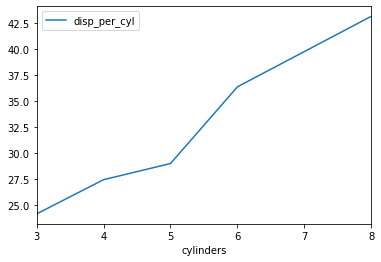

In [16]:
cylind.plot.line( y='disp_per_cyl' )

#### Q12. Save the new data frame into a file name 'summary.csv'.

In [17]:
cylind.to_csv('Summary.csv')

#### Q13. Create and display a numpy matrix using only the ‘mpg’ and ‘disp_per_cyl’ fields.

In [24]:
mat_values = cylind[['mpg','disp_per_cyl']].values
print(mat_values)

[[20.55       24.16666667]
 [29.28676471 27.44914216]
 [27.36666667 29.        ]
 [19.98571429 36.35714286]
 [14.9631068  43.12621359]]


#### Q14. Display the transpose of the new numpy matrix.

In [25]:
T_matrix = mat_values.transpose()
T_matrix

array([[20.55      , 29.28676471, 27.36666667, 19.98571429, 14.9631068 ],
       [24.16666667, 27.44914216, 29.        , 36.35714286, 43.12621359]])

#### Q15. Create and display a copy of the third column of the transposed matrix.

In [29]:
C_tmatrix = np.copy(T_matrix[:,2])
C_tmatrix

array([27.36666667, 29.        ])